<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Wrapper_Methods_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlxtend --upgrade --no-deps

Required Libraries

In [152]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

Wine DataSet

In [111]:
df =  pd.read_csv("/content/wine_dataset.csv")

Converting the into interger values using label encoding

In [122]:
# Integer Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['style'])

In [125]:
X =  df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
y = integer_encoded

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [128]:
print("Shape of train set", X_train.shape)
print("Shape of test set", X_test.shape)

Shape of train set (5197, 12)
Shape of test set (1300, 12)


In [9]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [129]:
RF = DecisionTreeClassifier(random_state = 0)

Foward Step Selection

In [144]:
sfs = SFS(RF, 
           k_features= (1,12), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=3).fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2022-04-29 01:25:36] Features: 1/12 -- score: 0.9222617646758327[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s finished

[2022-04-29 01:25:36] Features: 2/12 -- score: 0.9701751358295497[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2022-04-29 01:25:36] Features: 3/12 -- score: 0.9807580912477839[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [145]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.927870744373918, 0.9133949191685913, 0.9255...",0.922262,"(total_sulfur_dioxide,)",0.014274,0.006343,0.004485
2,"(4, 6)","[0.96999422965955, 0.9636258660508084, 0.97690...",0.970175,"(chlorides, total_sulfur_dioxide)",0.012203,0.005423,0.003835
3,"(1, 4, 6)","[0.9809578765147143, 0.98094688221709, 0.98036...",0.980758,"(volatile_acidity, chlorides, total_sulfur_dio...",0.000618,0.000275,0.000194
4,"(1, 4, 6, 7)","[0.9821119446047317, 0.983256351039261, 0.9821...",0.98249,"(volatile_acidity, chlorides, total_sulfur_dio...",0.00122,0.000542,0.000383
5,"(1, 4, 6, 7, 9)","[0.9821119446047317, 0.9861431870669746, 0.983...",0.98403,"(volatile_acidity, chlorides, total_sulfur_dio...",0.003717,0.001652,0.001168
6,"(0, 1, 4, 6, 7, 9)","[0.979803808424697, 0.9861431870669746, 0.9896...",0.985185,"(fixed_acidity, volatile_acidity, chlorides, t...",0.009135,0.004059,0.00287
7,"(0, 1, 4, 6, 7, 8, 9)","[0.9792267743796884, 0.9849884526558892, 0.988...",0.984223,"(fixed_acidity, volatile_acidity, chlorides, t...",0.008563,0.003805,0.002691
8,"(0, 1, 3, 4, 6, 7, 8, 9)","[0.9838430467397576, 0.9855658198614319, 0.986...",0.985184,"(fixed_acidity, volatile_acidity, residual_sug...",0.002199,0.000977,0.000691
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.981534910559723, 0.9861431870669746, 0.9855...",0.984415,"(fixed_acidity, volatile_acidity, residual_sug...",0.004613,0.00205,0.001449
10,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 11)","[0.981534910559723, 0.9861431870669746, 0.9867...",0.9848,"(fixed_acidity, volatile_acidity, residual_sug...",0.005222,0.00232,0.001641


In [146]:
# sfs.subsets_

Indices of best features

In [147]:
sfs.k_feature_idx_

(0, 1, 4, 6, 7, 9)

Names of best features

In [148]:
sfs.k_feature_names_

('fixed_acidity',
 'volatile_acidity',
 'chlorides',
 'total_sulfur_dioxide',
 'density',
 'sulphates')

Best Score

In [149]:
sfs.k_score_

0.9851847952639675

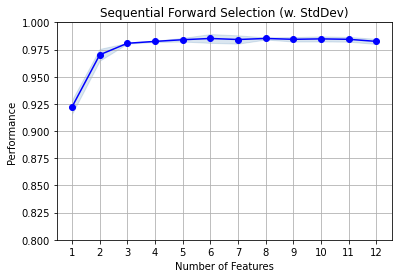

In [153]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

Backward Step Selection

In [154]:
sfs = SFS(RF, 
           k_features= (1,12), 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=3).fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.0s finished

[2022-04-29 01:35:03] Features: 11/1 -- score: 0.9844143060021757[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.9s finished

[2022-04-29 01:35:03] Features: 10/1 -- score: 0.9842219613205062[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished

[2022-04-29 01:35:04] Features: 9/1 -- score: 0.9861462965652925[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

Results

In [155]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.979803808424697, 0.9821016166281755, 0.9855...",0.98249,"(fixed_acidity, volatile_acidity, citric_acid,...",0.00533,0.002368,0.001675
11,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.983266012694749, 0.9855658198614319, 0.9844...",0.984414,"(volatile_acidity, citric_acid, residual_sugar...",0.002113,0.000939,0.000664
10,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11)","[0.9826889786497404, 0.9826789838337182, 0.987...",0.984222,"(volatile_acidity, citric_acid, residual_sugar...",0.004895,0.002175,0.001538
9,"(1, 3, 4, 5, 6, 7, 8, 9, 11)","[0.9838430467397576, 0.9878752886836027, 0.986...",0.986146,"(volatile_acidity, residual_sugar, chlorides, ...",0.003815,0.001695,0.001199
8,"(1, 3, 4, 5, 6, 7, 8, 9)","[0.9844200807847663, 0.9872979214780601, 0.985...",0.985761,"(volatile_acidity, residual_sugar, chlorides, ...",0.002662,0.001183,0.000836
7,"(1, 4, 5, 6, 7, 8, 9)","[0.9803808424697057, 0.9878752886836027, 0.987...",0.985185,"(volatile_acidity, chlorides, free_sulfur_diox...",0.007662,0.003405,0.002408
6,"(1, 4, 6, 7, 8, 9)","[0.981534910559723, 0.9849884526558892, 0.9878...",0.9848,"(volatile_acidity, chlorides, total_sulfur_dio...",0.005833,0.002592,0.001833
5,"(1, 4, 6, 7, 9)","[0.9821119446047317, 0.9861431870669746, 0.983...",0.98403,"(volatile_acidity, chlorides, total_sulfur_dio...",0.003717,0.001652,0.001168
4,"(1, 4, 6, 7)","[0.9821119446047317, 0.983256351039261, 0.9821...",0.98249,"(volatile_acidity, chlorides, total_sulfur_dio...",0.00122,0.000542,0.000383
3,"(1, 4, 6)","[0.9809578765147143, 0.98094688221709, 0.98036...",0.980758,"(volatile_acidity, chlorides, total_sulfur_dio...",0.000618,0.000275,0.000194


Indices of Best features

In [156]:
sfs.k_feature_idx_

(1, 3, 4, 5, 6, 7, 8, 9, 11)

Names of best features

In [157]:
sfs.k_feature_names_

('volatile_acidity',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'quality')

Best Score

In [158]:
sfs.k_score_

0.9861462965652925

Curve

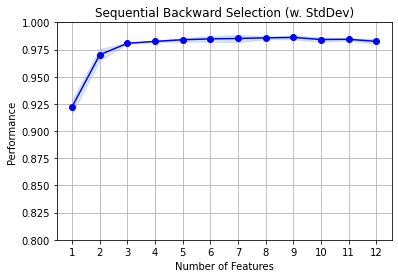

In [172]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

Exhaustive Feature Selection

In [160]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [162]:
efs = EFS(RF, min_features=2,max_features = 12,n_jobs = -1).fit(X_train,y_train)  

Features: 4083/4083

In [166]:
efs.best_score_

0.9867229954838234

In [167]:
efs.best_feature_names_

('volatile_acidity',
 'residual_sugar',
 'chlorides',
 'total_sulfur_dioxide',
 'density',
 'alcohol',
 'quality')